# AGN Experiments

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as pl

import numpy as np

import pickle

## Utility methods

In [2]:
def average_loss(x):
    loss = 0.0
    n = float(len(x))
    
    for h in x:
        loss += h['history'][0]
        
    return loss / n

def average_accuracy(x):
    accuracy = 0.0
    n = float(len(x))
    
    for h in x:
        accuracy += h['history'][1]
        
    return accuracy / n

def std_accuracy(x):
    a = [a['history'][1] for a in x]
    a = np.asarray(a)
    
    return np.std(a)

def std_loss(x):
    a = [a['history'][0] for a in x]
    a = np.asarray(a)
    
    return np.std(a)

def compute_plot_metrics(history):
    bin_delta = 5.0
    origin_time = float("inf")
    for h in history:
        t = h['timestamp']
        if t < origin_time:
            origin_time = t
    # Normalize wrt orgin time.
    for h in history:
        h['timestamp'] -= origin_time
        max_time = float("-inf")
    # Compute max time.
    for h in history:
        t = h['timestamp']
        if t > max_time:
            max_time = t
    # Computed binned data.
    x = []
    y = []
    error = []
    for i in range(0, int(max_time + 1)):
        start = float(i)
        d = [h for h in history if h['timestamp'] >= start and h['timestamp'] < (start + bin_delta)]
        if len(d) > 0:
            x.append(i)
            avg_loss = average_loss(d)
            avg_accuracy = average_accuracy(d)
            std_a = std_accuracy(d)
            std_l = std_loss(d)
            y.append(avg_accuracy)
            error.append(std_a)
    # Convert lists to Numpy arrays.
    x = np.asarray(x)
    y = np.asarray(y)
    error = np.asarray(error)
    
    return x, y, error

## Result processing

In [ ]:
# Load the AGN training and validation metrics.
with open("agn_results.pickle", 'rb') as handle:
    data = pickle.load(handle)

In [3]:
# Obtain the distributed hyperparameters that have been evaluated.
workers = np.arange(10, 41, 5)
lambdas = np.arange(10, 41, 5)

In [5]:
def load_data(data):
    # Obtain AGN plotting data.
    plotting_data = {}

    for w in workers:
        plotting_data[w] = {}
        for l in lambdas:
            plotting_data[w][l] = {}
            d = data[w][l][0]
            # Obtain the results from the experimental format.
            training_accuracy = d['training_accuracy']
            validation_accuracy = d['validation_accuracy']
            training_time = d['training_time']
            x, y, error = compute_plot_metrics(d['history'])
            # Store metrics in plotting format.
            plotting_data[w][l]['t_acc'] = training_accuracy
            plotting_data[w][l]['v_acc'] = validation_accuracy
            plotting_data[w][l]['training_time'] = training_time
            plotting_data[w][l]['x'] = x
            plotting_data[w][l]['y'] = y
            plotting_data[w][l]['error'] = error
            
    return plotting_data

In [ ]:
# Obtain AGN plotting data.
plotting_data = {}

for w in workers:
    plotting_data[w] = {}
    for l in lambdas:
        print(str(w) + " - " + str(l))
        plotting_data[w][l] = {}
        d = data[w][l][0]
        # Obtain the results from the experimental format.
        training_accuracy = d['training_accuracy']
        validation_accuracy = d['validation_accuracy']
        training_time = d['training_time']
        x, y, error = compute_plot_metrics(d['history'])
        # Store metrics in plotting format.
        plotting_data[w][l]['t_acc'] = training_accuracy
        plotting_data[w][l]['v_acc'] = validation_accuracy
        plotting_data[w][l]['training_time'] = training_time
        plotting_data[w][l]['x'] = x
        plotting_data[w][l]['y'] = y
        plotting_data[w][l]['error'] = error

## Plotting

### Lambda plots (AGN)

In [ ]:
optimizer = "AGN"
for l in lambdas:
    title = "Optimizer Training Accuracy\n"
    handles = []
    for w in workers:
        t = "{0:.2f}".format(plotting_data[w][l]['training_time']) + "s"
        t_acc = "{0:.2f}".format(plotting_data[w][l]['t_acc'] * 100) + "%"
        v_acc = "{0:.2f}".format(plotting_data[w][l]['v_acc'] * 100) + "%"
        title += optimizer + "  "
        title += r"$n = $" + str(w)
        title += r"  $\lambda = $" + str(l) + ":"
        title += r"  $t = $" + t
        title += r"  $acc = $" + t_acc
        title += r"  $val = $" + v_acc + "\n"
        x = plotting_data[w][l]['x']
        y = plotting_data[w][l]['y']
        error = plotting_data[w][l]['error']
        p, = pl.plot(x, y, label=optimizer + ' ' + r"$n = $" + str(w) + r" $\lambda = $" + str(l))
        #pl.fill_between(x, y - error, y + error, alpha=0.5)
        handles.append(p)
    fig = matplotlib.pyplot.gcf()
    fig.set_dpi(200)
    pl.grid(True)
    pl.xlim([-.1, 1200 + 0])
    pl.ylim([.9, 1])
    pl.xlabel("Seconds")
    pl.ylabel("Training Accuracy")
    pl.title(title)
    pl.legend(handles=handles)
    pl.show()

### Worker plots (AGN)

In [ ]:
optimizer = "AGN"
for w in workers:
    title = "Optimizer Training Accuracy\n"
    handles = []
    for l in lambdas:
        t = "{0:.2f}".format(plotting_data[w][l]['training_time']) + "s"
        t_acc = "{0:.2f}".format(plotting_data[w][l]['t_acc'] * 100) + "%"
        v_acc = "{0:.2f}".format(plotting_data[w][l]['v_acc'] * 100) + "%"
        title += optimizer + "  "
        title += r"$n = $" + str(w)
        title += r"  $\lambda = $" + str(l) + ":"
        title += r"  $t = $" + t
        title += r"  $acc = $" + t_acc
        title += r"  $val = $" + v_acc + "\n"
        x = plotting_data[w][l]['x']
        y = plotting_data[w][l]['y']
        error = plotting_data[w][l]['error']
        p, = pl.plot(x, y, label=optimizer + ' ' + r"$n = $" + str(w) + r" $\lambda = $" + str(l))
        #pl.fill_between(x, y - error, y + error, alpha=0.5)
        handles.append(p)
    fig = matplotlib.pyplot.gcf()
    fig.set_dpi(200)
    pl.grid(True)
    pl.xlim([-.1, 1200 + 0])
    pl.ylim([.9, 1])
    pl.xlabel("Seconds")
    pl.ylabel("Training Accuracy")
    pl.title(title)
    pl.legend(handles=handles)
    pl.show()

In [ ]:
# Load AEASGD training and validation metrics.
with open("aeasgd_results.pickle", 'rb') as handle:
    data = pickle.load(handle)

In [ ]:
# Obtain EASGD plotting data.
plotting_data = {}

for w in workers:
    plotting_data[w] = {}
    for l in lambdas:
        print(str(w) + " - " + str(l))
        plotting_data[w][l] = {}
        d = data[w][l][0]
        # Obtain the results from the experimental format.
        training_accuracy = d['training_accuracy']
        validation_accuracy = d['validation_accuracy']
        training_time = d['training_time']
        x, y, error = compute_plot_metrics(d['history'])
        # Store metrics in plotting format.
        plotting_data[w][l]['t_acc'] = training_accuracy
        plotting_data[w][l]['v_acc'] = validation_accuracy
        plotting_data[w][l]['training_time'] = training_time
        plotting_data[w][l]['x'] = x
        plotting_data[w][l]['y'] = y
        plotting_data[w][l]['error'] = error

### Lambda plots (AEASGD)

In [ ]:
optimizer = "AEASGD"
for l in lambdas:
    title = "Optimizer Training Accuracy\n"
    handles = []
    for w in workers:
        t = "{0:.2f}".format(plotting_data[w][l]['training_time']) + "s"
        t_acc = "{0:.2f}".format(plotting_data[w][l]['t_acc'] * 100) + "%"
        v_acc = "{0:.2f}".format(plotting_data[w][l]['v_acc'] * 100) + "%"
        title += optimizer + "  "
        title += r"$n = $" + str(w)
        title += r"  $\lambda = $" + str(l) + ":"
        title += r"  $t = $" + t
        title += r"  $acc = $" + t_acc
        title += r"  $val = $" + v_acc + "\n"
        x = plotting_data[w][l]['x']
        y = plotting_data[w][l]['y']
        error = plotting_data[w][l]['error']
        p, = pl.plot(x, y, label=optimizer + ' ' + r"$n = $" + str(w) + r" $\lambda = $" + str(l))
        #pl.fill_between(x, y - error, y + error, alpha=0.5)
        handles.append(p)
    fig = matplotlib.pyplot.gcf()
    fig.set_dpi(200)
    pl.grid(True)
    pl.xlim([-.1, 1200 + 0])
    pl.ylim([.9, 1])
    pl.xlabel("Seconds")
    pl.ylabel("Training Accuracy")
    pl.title(title)
    pl.legend(handles=handles)
    pl.show()

### Worker plots (AEASGD)

In [ ]:
optimizer = "AEASGD"
for w in workers:
    title = "Optimizer Training Accuracy\n"
    handles = []
    for l in lambdas:
        t = "{0:.2f}".format(plotting_data[w][l]['training_time']) + "s"
        t_acc = "{0:.2f}".format(plotting_data[w][l]['t_acc'] * 100) + "%"
        v_acc = "{0:.2f}".format(plotting_data[w][l]['v_acc'] * 100) + "%"
        title += optimizer + "  "
        title += r"$n = $" + str(w)
        title += r"  $\lambda = $" + str(l) + ":"
        title += r"  $t = $" + t
        title += r"  $acc = $" + t_acc
        title += r"  $val = $" + v_acc + "\n"
        x = plotting_data[w][l]['x']
        y = plotting_data[w][l]['y']
        error = plotting_data[w][l]['error']
        p, = pl.plot(x, y, label=optimizer + ' ' + r"$n = $" + str(w) + r" $\lambda = $" + str(l))
        #pl.fill_between(x, y - error, y + error, alpha=0.5)
        handles.append(p)
    fig = matplotlib.pyplot.gcf()
    fig.set_dpi(200)
    pl.grid(True)
    pl.xlim([-.1, 1200 + 0])
    pl.ylim([.9, 1])
    pl.xlabel("Seconds")
    pl.ylabel("Training Accuracy")
    pl.title(title)
    pl.legend(handles=handles)
    pl.show()

## AGN vs ADAG-AGN

In [10]:
# Obtain the distributed hyperparameters that have been evaluated.
workers = np.arange(20, 41, 5)
lambdas = np.arange(10, 21, 5)

# Load the AGN training and validation metrics.
with open("agn_results.pickle", 'rb') as handle:
    data = pickle.load(handle)

plotting_agn = load_data(data)

# Load ADAG-AGN training and validation metrics.
with open("adag_results.pickle", "rb") as handle:
    data = pickle.load(handle)
    
plotting_adag = load_data(data)

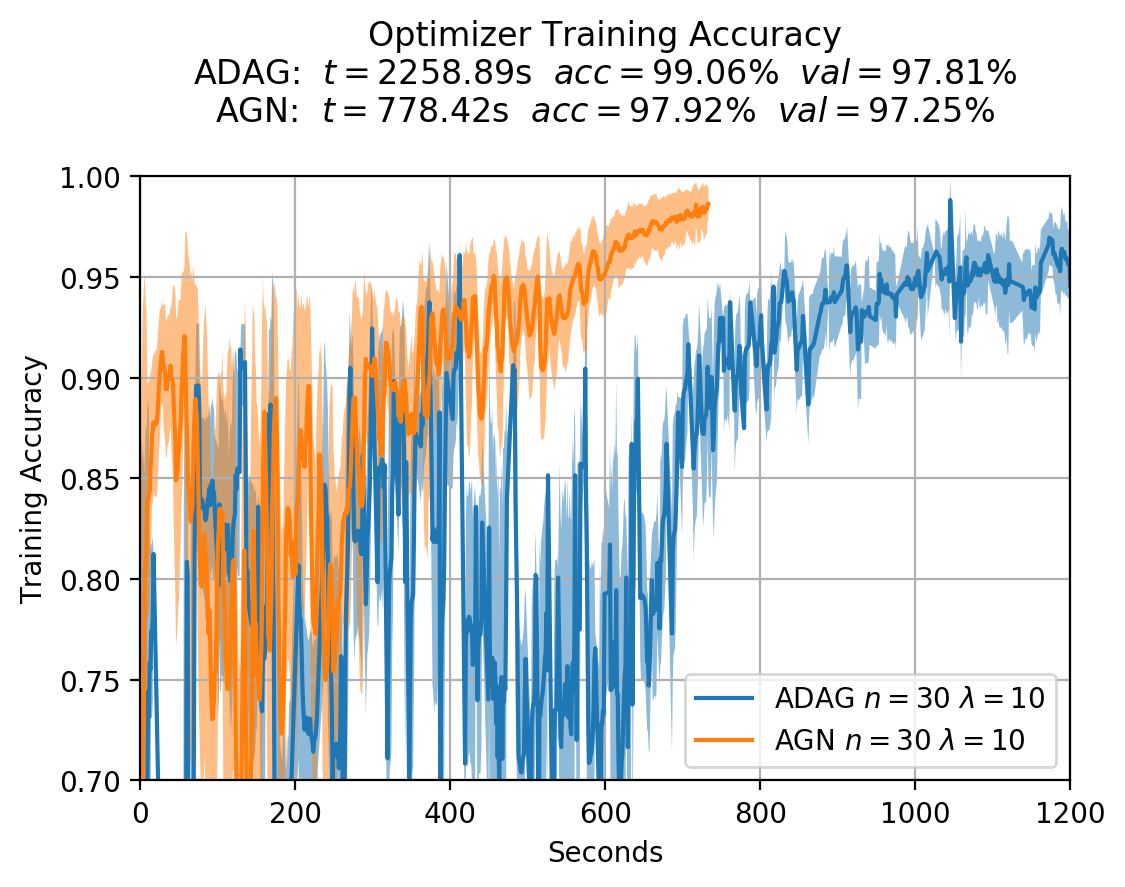

In [20]:
title = "Optimizer Training Accuracy\n"
handles = []
for o in ["ADAG", "AGN"]:
    for w in [30]:
        for l in [10]:
            if o is "AGN":
                plotting_data = plotting_agn
            else:
                plotting_data = plotting_adag
            t = "{0:.2f}".format(plotting_data[w][l]['training_time']) + "s"
            t_acc = "{0:.2f}".format(plotting_data[w][l]['t_acc'] * 100) + "%"
            v_acc = "{0:.2f}".format(plotting_data[w][l]['v_acc'] * 100) + "%"
            title += o + ":"
            title += r"  $t = $" + t
            title += r"  $acc = $" + t_acc
            title += r"  $val = $" + v_acc + "\n"
            x = plotting_data[w][l]['x']
            y = plotting_data[w][l]['y']
            error = plotting_data[w][l]['error']
            p, = pl.plot(x, y, label=o + ' ' + r"$n = $" + str(w) + r" $\lambda = $" + str(l))
            pl.fill_between(x, y - error, y + error, alpha=0.5)
            handles.append(p)
fig = matplotlib.pyplot.gcf()
fig.set_dpi(200)
pl.grid(True)
pl.xlim([-.1, 1200 + 0])
pl.ylim([.7, 1])
pl.xlabel("Seconds")
pl.ylabel("Training Accuracy")
pl.title(title)
pl.legend(handles=handles)
pl.show()

In [ ]:
d_a = plotting_agn
d_e = plotting_easgd

for w in workers:
    for l in lambdas:
        t_a = "{0:.2f}".format(d_a[w][l]['training_time'])
        t_acc_a = "{0:.2f}".format(d_a[w][l]['t_acc'] * 100)
        v_acc_a = "{0:.2f}".format(d_a[w][l]['v_acc'] * 100)
        t_e = "{0:.2f}".format(d_e[w][l]['training_time'])
        t_acc_e = "{0:.2f}".format(d_e[w][l]['t_acc'] * 100)
        v_acc_e = "{0:.2f}".format(d_e[w][l]['v_acc'] * 100)
        line = str(w) + " & "
        line += str(l) + " & "
        if float(t_a) < float(t_e):
            line += "\\textbf{" + t_a + "s} & "
        else:
            line += t_a + "s & "
        if float(t_acc_a) > float(t_acc_e):
            line += "\\textbf{" + t_acc_a + "\%} & "
        else:
            line += t_acc_a + "\% & "
        if float(v_acc_a) > float(v_acc_e):
            line += "\\textbf{" + v_acc_a + "\%} & "
        else:
            line += v_acc_a + "\% & "
            
        if float(t_a) > float(t_e):
            line += "\\textbf{" + t_e + "s} & "
        else:
            line += t_e + "s & "
        if float(t_acc_a) < float(t_acc_e):
            line += "\\textbf{" + t_acc_e + "\%} & "
        else:
            line += t_acc_e + "\% & "
        if float(v_acc_a) < float(v_acc_e):
            line += "\\textbf{" + v_acc_e + "\%} "
        else:
            line += v_acc_e + "\% "
        line += " \\\ \n\\hline"
        print(line)

### Plot decline of accuracy w.r.t. number of workers

In [ ]:
d_a = plotting_agn
d_e = plotting_easgd

easgd = []
agn = []

# Obtain AGN metrics.
for w in workers:
    best_t_acc = 0.0
    best_v_acc = 0.0
    for l in lambdas:
        if d_a[w][l]['t_acc'] > best_t_acc:
            best_t_acc = d_a[w][l]['t_acc']
        if d_a[w][l]['v_acc'] > best_v_acc:
            best_v_acc = d_a[w][l]['v_acc']
    agn.append((best_t_acc, best_v_acc))
    
# Obtain AEASGD
for w in workers:
    best_t_acc = 0.0
    best_v_acc = 0.0
    for l in lambdas:
        #if d_e[w][l]['t_acc'] > best_t_acc:
        best_t_acc += d_e[w][l]['t_acc']
        #if d_e[w][l]['v_acc'] > best_v_acc:
        best_v_acc += d_e[w][l]['v_acc']
    best_t_acc /= float(len(lambdas))
    best_v_acc /= float(len(lambdas))
    easgd.append((best_t_acc, best_v_acc))

In [ ]:
agn

In [ ]:
easgd

In [ ]:
title = "Accuracy vs. Number of workers"
x_label = "Workers"
y_label = "Accuracy"

x = np.arange(10, 41, 5)

agn_t_acc = [x[0] for x in agn]
agn_v_acc = [x[1] for x in agn]
aeasgd_t_acc = [x[0] for x in easgd]
aeasgd_v_acc = [x[1] for x in easgd]

handles = []

h, = pl.plot(x, agn_t_acc, label="AGN Training", linewidth=3)
handles.append(h)

h, = pl.plot(x, agn_v_acc, label="AGN Validation", linewidth=3)
handles.append(h)

h, = pl.plot(x, aeasgd_t_acc, label="AEASGD Training", linewidth=3)
handles.append(h)

h, = pl.plot(x, aeasgd_v_acc, label="AEASGD Validation", linewidth=3)
handles.append(h)

fig = matplotlib.pyplot.gcf()
fig.set_dpi(200)
pl.grid(True)
pl.ylim([.965, 1])
pl.xlabel(x_label)
pl.ylabel(y_label)
pl.title(title)
pl.legend(handles=handles)
pl.show()

### Plot temporal efficiency

In [ ]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [ ]:
s = 0
n = 0
for w in workers:
    for l in lambdas:
        n += 1
        # Obtain AGN metrics.
        agn_x = np.asarray(plotting_agn[w][l]['x'])
        agn_y = np.asarray(plotting_agn[w][l]['y'])
        agn_t = float(agn_x[len(agn_x) - 1])
        # Obtain AEASGD metrics.
        easgd_x = np.asarray(plotting_easgd[w][l]['x'])
        easgd_y = np.asarray(plotting_easgd[w][l]['y'])
        easgd_t = float(easgd_x[len(easgd_x) - 1])
        # Check which m needs to be used.
        if agn_t <= easgd_t:
            m = agn_t
        else:
            m = easgd_t
        # Compute the performance surfaces.
        f = InterpolatedUnivariateSpline(agn_x, agn_y, k=1)
        s_agn = f.integral(0, m)
        f = InterpolatedUnivariateSpline(easgd_x, easgd_y, k=1)
        s_easgd = f.integral(0, m)
        # Compute the ratio of the performance surfaces.
        r = s_agn / s_easgd
        if r > 1:
            s += 1
        if w == 40 and l == 15:
            pl.title("Temporal Efficiency AGN vs. AEASGD")
            handles = []
            h, = pl.plot(agn_x, agn_y, label=r"AGN $n = $" + str(w) + r" $\lambda = $" + str(l))
            handles.append(h)
            h, = pl.plot(easgd_x, easgd_y, label=r"AEASGD $n = $" + str(w) + r" $\lambda = $" + str(l))
            handles.append(h)
            pl.xlim([0, m])
            pl.xlabel("Seconds")
            pl.ylabel("Accuracy")
            fig = matplotlib.pyplot.gcf()
            fig.set_dpi(200)
            pl.grid(True)
            pl.legend(handles=handles)
            pl.show()
        #if r > 1:
        #    print(str(w) + " & " + str(l) + " & \\textbf{" + "{0:.3f}".format(r) + "} \\\ \n\\hline")
        #else:
        #    print(str(w) + " & " + str(l) + " & " + "{0:.3f}".format(r) + " \\\ \n\\hline")

print(float(s)/float(n))